In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: x, input_shape=(10,10,5)))

model.compile(loss="mse",metrics=['accuracy'])


In [8]:
inp=tf.zeros((3,10,10,5))
labels=tf.ones((3,10,10,5))*50
model.evaluate(x=inp,y=labels)

3/3 [==============================] - 0s 29ms/sample - loss: 2500.0000 - accuracy: 1.0000


[2500.0, 1.0]

In [27]:
offset=1

spot=np.zeros((1,10,10,1),dtype=np.float32)
spot[:,:10,:10,:]=0.3
spot[:,:5,:5,:]=0.6
spot[:,:2,:2,:]=0.9
spot[:,:1,:1,:]=1


true=np.zeros((1,100,100,1),dtype=np.float32)
true[:,:10,:10,:]=spot
pred=np.zeros((1,100,100,1),dtype=np.float32)

pred[:,offset:offset+10,offset:offset+10,:]=spot

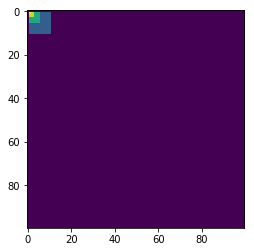

In [30]:
plt.imshow(pred[0][...,0])

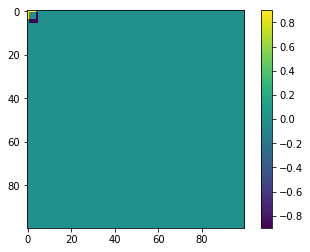

In [22]:
error=true-pred
positive_error=error*(error>0)
plt.imshow(error[0][:,:,0])
plt.colorbar()

In [41]:
class AnalogRecallError(tf.keras.metrics.Metric):
    """This metric returns the overlap of the true gaussian 'islands' and the predicted ones"""
    def __init__(self, name='analog_recall_error',thershold=0.01, **kwargs):
        super(AnalogRecallError, self).__init__(name=name, **kwargs)
        self.mean = self.add_weight(name='mean', initializer='zeros')
        self.thershold=thershold
    
    def update_state(self, y_true, y_pred):        
        true_island_sum=tf.reduce_sum(tf.where(y_true>self.thershold,y_true,0)) #get sum of the true island
        true_island_size=tf.cast(tf.math.count_nonzero(y_true>self.thershold),dtype=tf.float32) #get size of the island   
        mean_island_true=true_island_sum/true_island_size #average island value
               
        err=y_true-y_pred  #get all error
        recall_err=tf.where(err>0,err,0)  #get only recall error, the parts where prediction is missing
        recall_err_sum=tf.reduce_sum(recall_err)        
        err_island_size=tf.cast(tf.math.count_nonzero(true>self.thershold),tf.float32)  #get size of the islands above thershold
        
        mean_island_recall_err=recall_err_sum/err_island_size  #mean of the error 
        
        value=mean_island_recall_err/mean_island_true
        self.mean.assign_add(value)
    def result(self):
        return self.mean

In [43]:
metrics={
        "Accuracy":tf.keras.metrics.Accuracy(),
        "MeanAbsoluteError":tf.keras.metrics.MeanAbsoluteError(),
        "Recall":tf.keras.metrics.Recall(),
        "Precision":tf.keras.metrics.Precision(),
        "MeanAbsolutePercentageError":tf.keras.metrics.MeanAbsolutePercentageError(),
        "AnalogRecallError":AnalogRecallError()        
}
for offset in [0,1,2,5,10,50]:
    print("\nFor Offset - %d"%offset)
    for metric_name,metric in metrics.items():
        pred=np.zeros((1,100,100,1),dtype=np.float32)
        pred[:,offset:offset+10,offset:offset+10,:]=spot
        metric.reset_states()
        metric.update_state(tf.constant(true), tf.constant(pred))
        result=metric.result().numpy()
        print(metric_name,"-",result)


For Offset - 0
AnalogRecallError - 0.0
Recall - 0.25
Precision - 1.0
MeanAbsoluteError - 0.0
MeanAbsolutePercentageError - 0.0
Accuracy - 1.0

For Offset - 1
AnalogRecallError - 0.24226801
Recall - 0.25
Precision - 1.0
MeanAbsoluteError - 0.0018799999
MeanAbsolutePercentageError - 570000.3
Accuracy - 0.9949

For Offset - 2
AnalogRecallError - 0.43556696
Recall - 0.25
Precision - 1.0
MeanAbsoluteError - 0.0033799994
MeanAbsolutePercentageError - 1080000.5
Accuracy - 0.9908

For Offset - 5
AnalogRecallError - 0.806701
Recall - 0.25
Precision - 1.0
MeanAbsoluteError - 0.0062600016
MeanAbsolutePercentageError - 2250001.0
Accuracy - 0.9825

For Offset - 10
AnalogRecallError - 0.99999994
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.0077600013
MeanAbsolutePercentageError - 3880001.5
Accuracy - 0.98

For Offset - 50
AnalogRecallError - 0.99999994
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.0077600004
MeanAbsolutePercentageError - 3880001.5
Accuracy - 0.98


Vector field metrics (PAFs)

In [44]:
spot=np.zeros((1,10,10,1),dtype=np.float32)
spot[:,:10,:10,:]=0.3

true=np.zeros((1,100,100,1),dtype=np.float32)
true[:,:10,:10,:]=spot

In [45]:
metrics={
        "Accuracy":tf.keras.metrics.Accuracy(),
        "MeanAbsoluteError":tf.keras.metrics.MeanAbsoluteError(),
        "Recall":tf.keras.metrics.Recall(),
        "Precision":tf.keras.metrics.Precision(),
        "MeanAbsolutePercentageError":tf.keras.metrics.MeanAbsolutePercentageError(),
        "AnalogRecallError":AnalogRecallError()        
}
for offset in [0,1,2,5,10,50]:
    print("\nFor Offset - %d"%offset)
    for metric_name,metric in metrics.items():
        pred=np.zeros((1,100,100,1),dtype=np.float32)
        pred[:,offset:offset+10,offset:offset+10,:]=spot
        metric.reset_states()
        metric.update_state(tf.constant(true), tf.constant(pred))
        result=metric.result().numpy()
        print(metric_name,"-",result)


For Offset - 0
AnalogRecallError - 0.0
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.0
MeanAbsolutePercentageError - 0.0
Accuracy - 1.0

For Offset - 1
AnalogRecallError - 0.18999998
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.00114
MeanAbsolutePercentageError - 570000.2
Accuracy - 0.9962

For Offset - 2
AnalogRecallError - 0.35999995
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.00216
MeanAbsolutePercentageError - 1080000.4
Accuracy - 0.9928

For Offset - 5
AnalogRecallError - 0.74999994
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.0045000007
MeanAbsolutePercentageError - 2250000.8
Accuracy - 0.985

For Offset - 10
AnalogRecallError - 0.9999999
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.0060000014
MeanAbsolutePercentageError - 3000001.0
Accuracy - 0.98

For Offset - 50
AnalogRecallError - 0.9999999
Recall - 0.0
Precision - 0.0
MeanAbsoluteError - 0.006
MeanAbsolutePercentageError - 3000001.0
Accuracy - 0.98
